In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the CSV
df = pd.read_csv("..\\Data\\BrentOilPrices.csv")
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [5]:
df.set_index("Date", inplace=True)
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [6]:
# Create log returns for stationarity
df['log_return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))
df.dropna(inplace=True)

In [7]:
df.head()

,Price,log_return
Date,,
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
1987-05-27,18.60,-0.001612


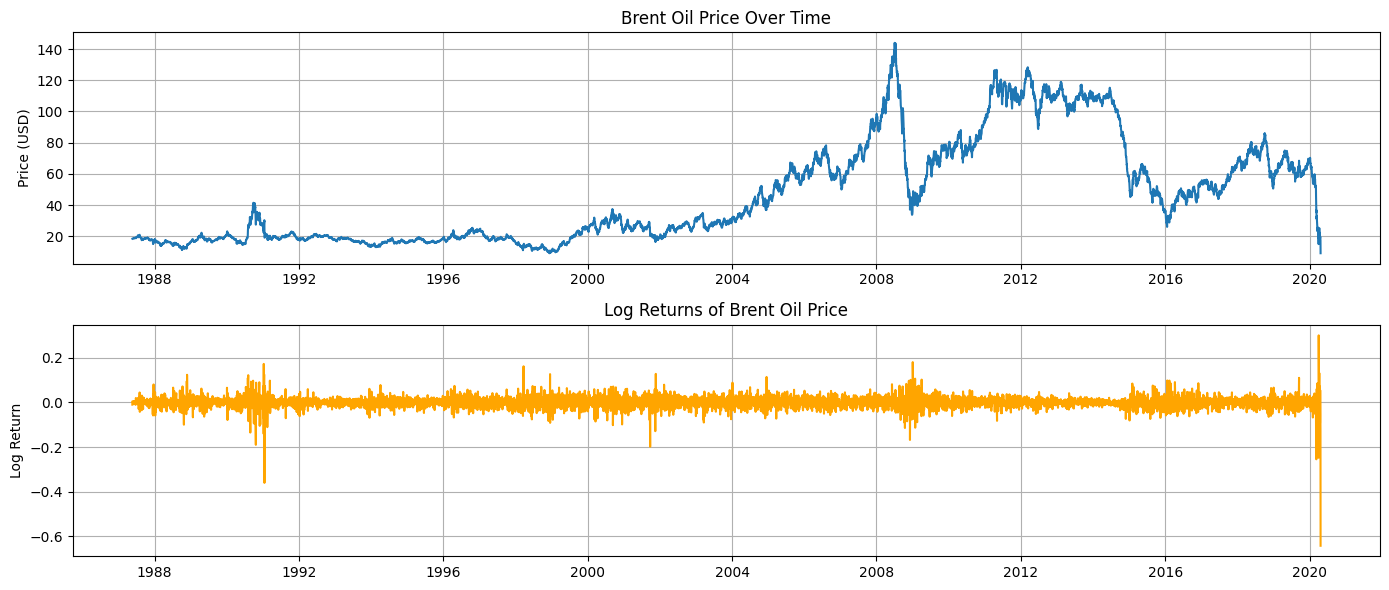

In [8]:
# Plot the price and log returns
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Price'], label='Brent Oil Price')
plt.title("Brent Oil Price Over Time")
plt.ylabel("Price (USD)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['log_return'], label='Log Returns', color='orange')
plt.title("Log Returns of Brent Oil Price")
plt.ylabel("Log Return")
plt.grid(True)

plt.tight_layout()
plt.show()

Bayesian Change Point Model using PyMC3

In [ ]:
import pymc3 as pm
import arviz as az